# Stock-Bot

Decision to buy/sell is made when a certain SMA is crossed.

- get gradiant of all SMAs at that point
- guess price when the stock cross that SMA again

### How?

- when stock cross -> ask experts

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Pre-processing

In [2]:
companies_df = pd.read_csv('data/sp500_companies.csv')
index_df = pd.read_csv('data/sp500_index.csv')
stocks_df = pd.read_csv('data/sp500_stocks.csv')

In [6]:
companies_df.sort_values(by='Weight', ascending=False).head(3)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,144.49,2298561429504,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.064839
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,252.51,1895839956992,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.053478
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,93.56,1209290981376,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.034112


In [23]:
appl_df = stocks_df[stocks_df.Symbol == 'AAPL']
appl_df.sort_values(by='Date').drop(columns=['Symbol', 'Adj Close'])
appl_df = appl_df.tail(365) # get last year of data
appl_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
149549,2021-07-02,AAPL,139.960007,139.960007,140.000000,137.750000,137.899994,78852600.0
149550,2021-07-06,AAPL,142.020004,142.020004,143.149994,140.070007,140.070007,108181800.0
149551,2021-07-07,AAPL,144.570007,144.570007,144.889999,142.660004,143.539993,104911600.0
149552,2021-07-08,AAPL,143.240005,143.240005,144.059998,140.669998,141.580002,105575500.0
149553,2021-07-09,AAPL,145.110001,145.110001,145.649994,142.649994,142.750000,99890800.0
...,...,...,...,...,...,...,...,...
149909,2022-12-06,AAPL,142.910004,142.910004,147.300003,141.919998,147.070007,64727200.0
149910,2022-12-07,AAPL,140.940002,140.940002,143.369995,140.000000,142.190002,69721100.0
149911,2022-12-08,AAPL,142.649994,142.649994,143.520004,141.100006,142.360001,62128300.0
149912,2022-12-09,AAPL,142.160004,142.160004,145.570007,140.899994,142.339996,76069500.0


In [26]:
appl_df['SMA3'] = appl_df['Close'].rolling(3).mean()
appl_df['SMA5'] = appl_df['Close'].rolling(5).mean()
appl_df['SMA10'] = appl_df['Close'].rolling(10).mean()
appl_df['SMA30'] = appl_df['Close'].rolling(30).mean()
appl_df.dropna(inplace=True)
appl_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,SMA30,SMA50,SMA100,SMA3,SMA5,SMA10
149677,2022-01-04,AAPL,179.699997,179.699997,182.940002,179.119995,182.630005,99310400.0,171.553000,163.368401,155.309500,179.760000,179.372000,178.139000
149678,2022-01-05,AAPL,174.919998,174.919998,180.169998,174.639999,179.610001,94537600.0,172.016334,163.894001,155.567700,178.876663,178.479999,178.331999
149679,2022-01-06,AAPL,172.000000,172.000000,175.300003,171.639999,172.699997,96904000.0,172.369333,164.347601,155.776500,175.539998,177.239999,177.967999
149680,2022-01-07,AAPL,172.169998,172.169998,174.139999,171.029999,172.889999,86709100.0,172.710333,164.814001,155.996300,173.029999,176.159998,177.556999
149681,2022-01-10,AAPL,172.190002,172.190002,172.500000,168.169998,169.080002,106765600.0,173.223000,165.206401,156.254600,172.120000,174.195999,176.742999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149909,2022-12-06,AAPL,142.910004,142.910004,147.300003,141.919998,147.070007,64727200.0,146.797999,145.518599,152.868199,145.783335,146.738000,146.844000
149910,2022-12-07,AAPL,140.940002,140.940002,143.369995,140.000000,142.190002,69721100.0,146.417999,145.302199,152.806899,143.493337,145.320001,145.920001
149911,2022-12-08,AAPL,142.649994,142.649994,143.520004,141.100006,142.360001,62128300.0,146.194666,145.158399,152.723399,142.166667,144.188000,145.078000
149912,2022-12-09,AAPL,142.160004,142.160004,145.570007,140.899994,142.339996,76069500.0,146.106666,145.151999,152.614599,141.916667,143.058002,144.483000


<AxesSubplot: >

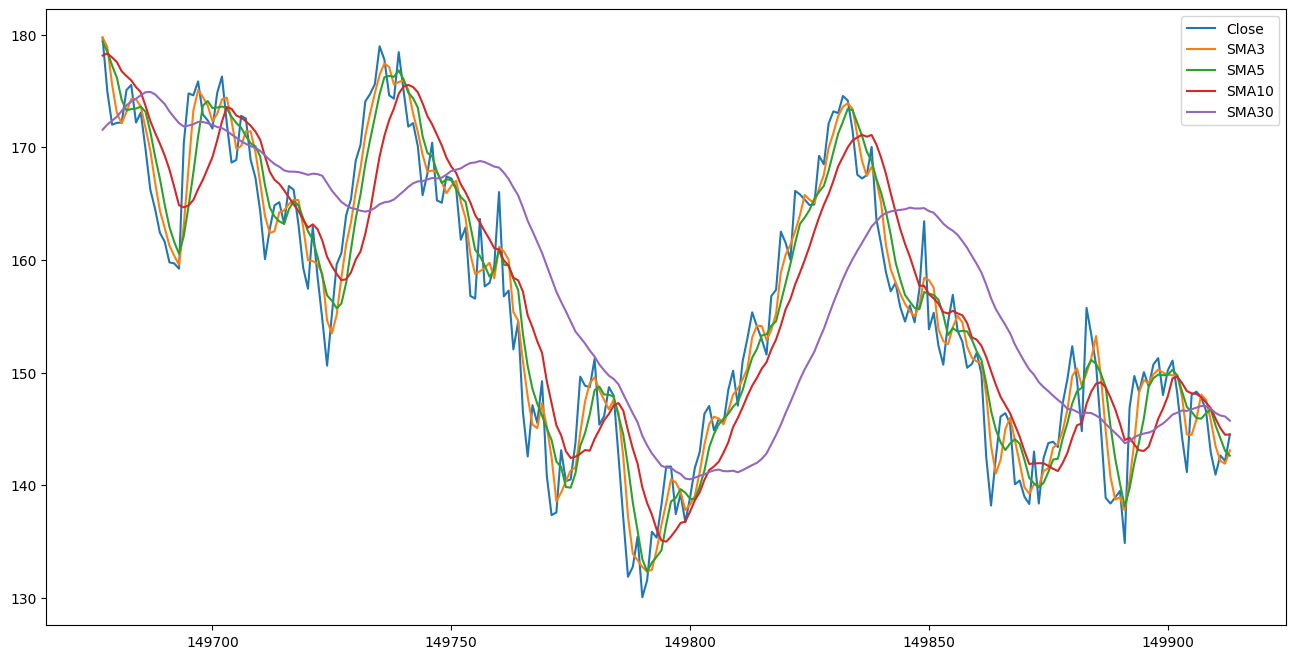

In [29]:
# sns.lineplot(data=appl_df, x=appl_df.index, y=appl_df.Close)
appl_df[['Close', 'SMA3', 'SMA5', 'SMA10', 'SMA30']].plot(label='AAPL', figsize=(16, 8))